<a href="https://colab.research.google.com/github/Alirezarahhmati/Movie_Recommender_System/blob/Develop/Copy_of_MovieRecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommender System

## Loading the dataset

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezarahhmati","key":"73be1ed3ad085330a3f4400239645139"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d rounakbanik/the-movies-dataset

 99% 226M/228M [00:08<00:00, 32.1MB/s]
100% 228M/228M [00:08<00:00, 28.6MB/s]


In [4]:
! unzip /content/the-movies-dataset.zip -d /content/the_movies_dataset

Archive:  /content/the-movies-dataset.zip
  inflating: /content/the_movies_dataset/credits.csv  
  inflating: /content/the_movies_dataset/keywords.csv  
  inflating: /content/the_movies_dataset/links.csv  
  inflating: /content/the_movies_dataset/links_small.csv  
  inflating: /content/the_movies_dataset/movies_metadata.csv  
  inflating: /content/the_movies_dataset/ratings.csv  
  inflating: /content/the_movies_dataset/ratings_small.csv  


Content Base

Create a high-quality dataset suitable for training a clustering model.

In [23]:
import pandas as pd

df = pd.read_csv('/content/the_movies_dataset/movies_metadata.csv')

<ipython-input-23-e4b7c0ebe1d6>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/the_movies_dataset/movies_metadata.csv')


We are removing certain features that are not suitable for our training model.

In [20]:
# df = merged_df.drop(['budget', 'homepage', 'id', 'imdb_id', 'overview', 'poster_path', 'revenue','tagline'], axis=1)

# movie_id = merged_df['movieId']

# merged_df = merged_df.drop(['movieId'], axis=1)

In [21]:
# merged_df.head(5)

### EDA

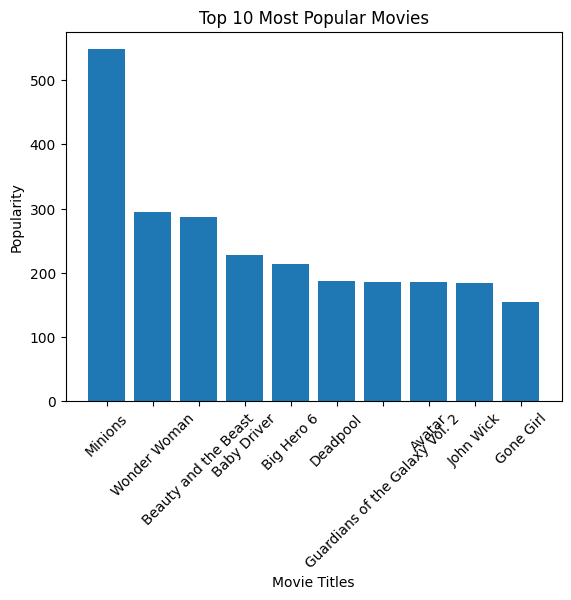

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your dataset stored in a pandas DataFrame called "df"
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df = df.dropna(subset=['popularity'])

top_10_movies = df.groupby('title')['popularity'].max().nlargest(10)

titles = top_10_movies.index
popularity_scores = top_10_movies.values

# Plotting the data
plt.bar(titles, popularity_scores)
plt.xlabel('Movie Titles')
plt.ylabel('Popularity')
plt.title('Top 10 Most Popular Movies')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

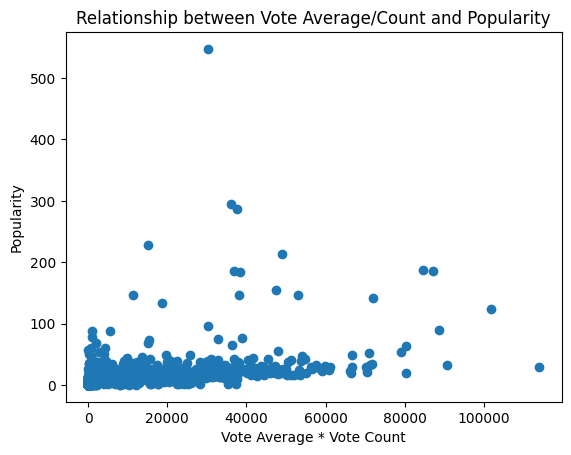

In [32]:
import matplotlib.pyplot as plt

# Assuming you have your dataset stored in a pandas DataFrame called "df"
vote_average = df['vote_average']
vote_count = df['vote_count']
popularity = df['popularity']

# Plotting the data
plt.scatter(vote_average * vote_count, popularity)
plt.xlabel('Vote Average * Vote Count')
plt.ylabel('Popularity')
plt.title('Relationship between Vote Average/Count and Popularity')
plt.show()


In [34]:
C = df['vote_average'].mean()
C

5.618207215134184

In [36]:
m = df['vote_count'].quantile(0.9)
m

160.0

In [38]:
q_movies = df.copy().loc[df['vote_count'] >= m]
q_movies.shape

(4555, 24)

In [39]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [40]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [41]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


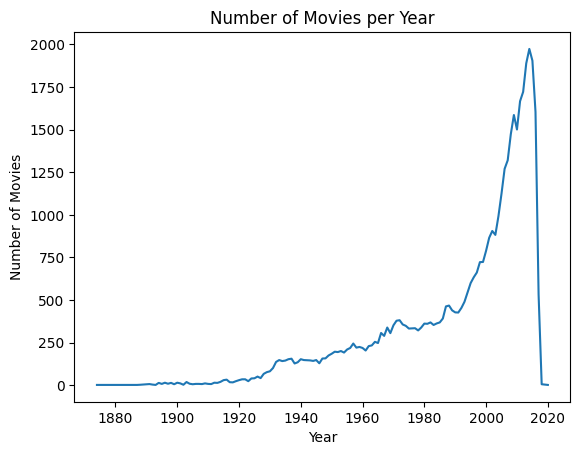

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your dataset stored in a pandas DataFrame called "df"
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')
df['year'] = df['release_date'].dt.year

year_counts = df['year'].value_counts().sort_index()

# Plotting the data
plt.plot(year_counts.index, year_counts.values, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year')
# plt.xticks(year_counts.index)
# plt.grid(True)
plt.show()

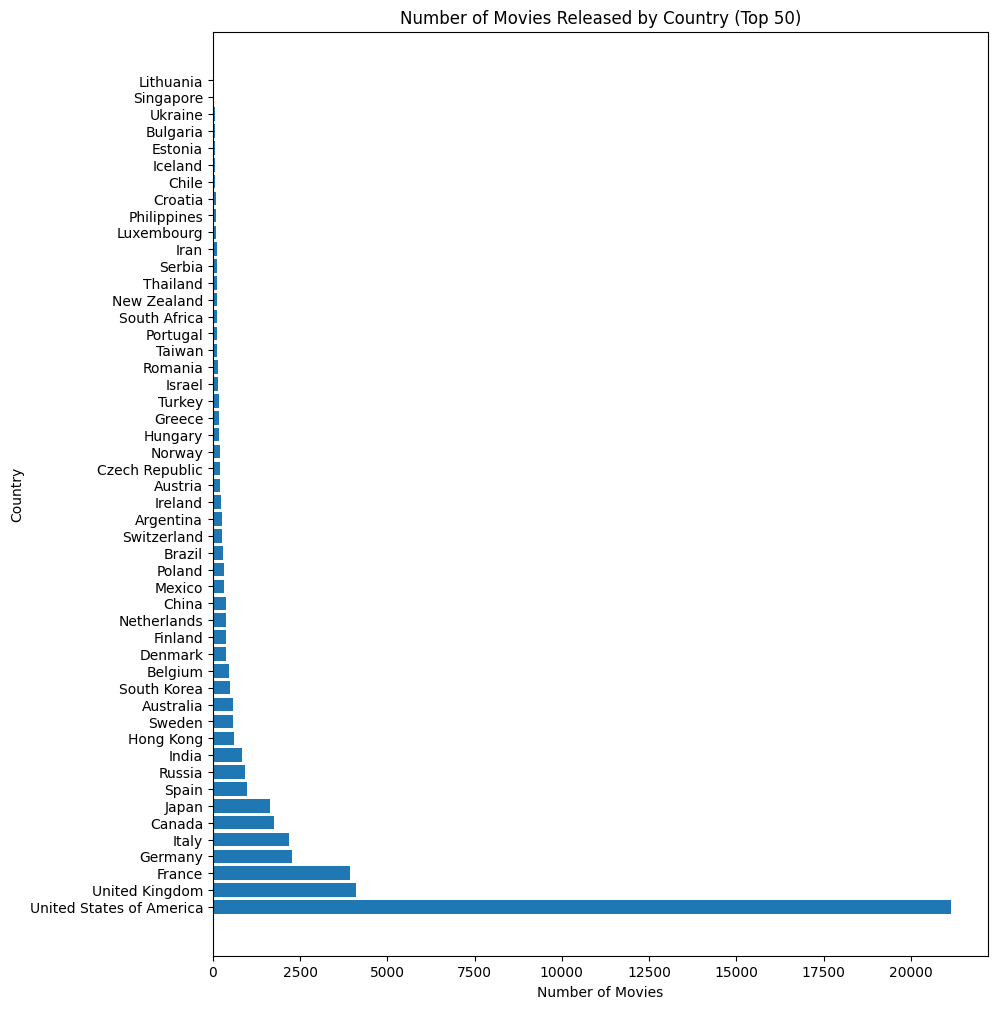

In [85]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Create an empty dictionary to store the count of movies per country
country_counts = {}

# Iterate over each row and count the movies for each country
for countries in df['production_countries']:
    for country in countries:
        country_name = country['name']
        if country_name in country_counts:
            country_counts[country_name] += 1
        else:
            country_counts[country_name] = 1

# Convert the dictionary to a DataFrame and select the top 50 countries
country_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['Movie Count'])
country_df = country_df.sort_values(by='Movie Count', ascending=False).head(50)

# Plotting the data
plt.figure(figsize=(10, 12))
plt.barh(country_df.index, country_df['Movie Count'])
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Number of Movies Released by Country (Top 50)')
plt.show()


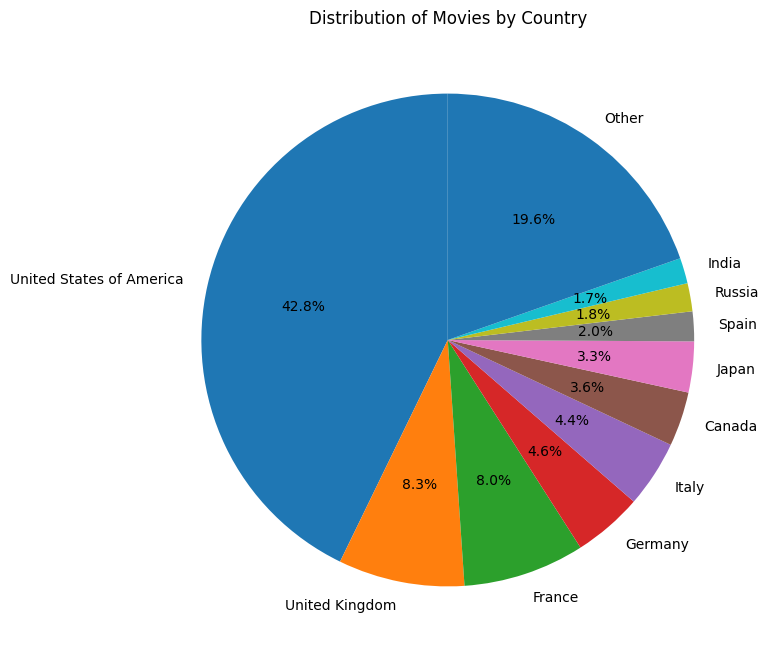

In [86]:
# Convert the dictionary to a DataFrame and select the top 10 countries
country_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['Movie Count'])
country_df = country_df.sort_values(by='Movie Count', ascending=False)

# Extract the top 10 countries and calculate the count for the "Other" segment
top_10_countries = country_df.head(10)
other_count = country_df[10:].sum()

# Create a list of country labels including the top 10 countries and the "Other" segment
country_labels = top_10_countries.index.tolist() + ['Other']

# Create a list of movie counts including the counts for the top 10 countries and the "Other" segment
country_counts = top_10_countries['Movie Count'].tolist() + [other_count]

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies by Country')
plt.show()

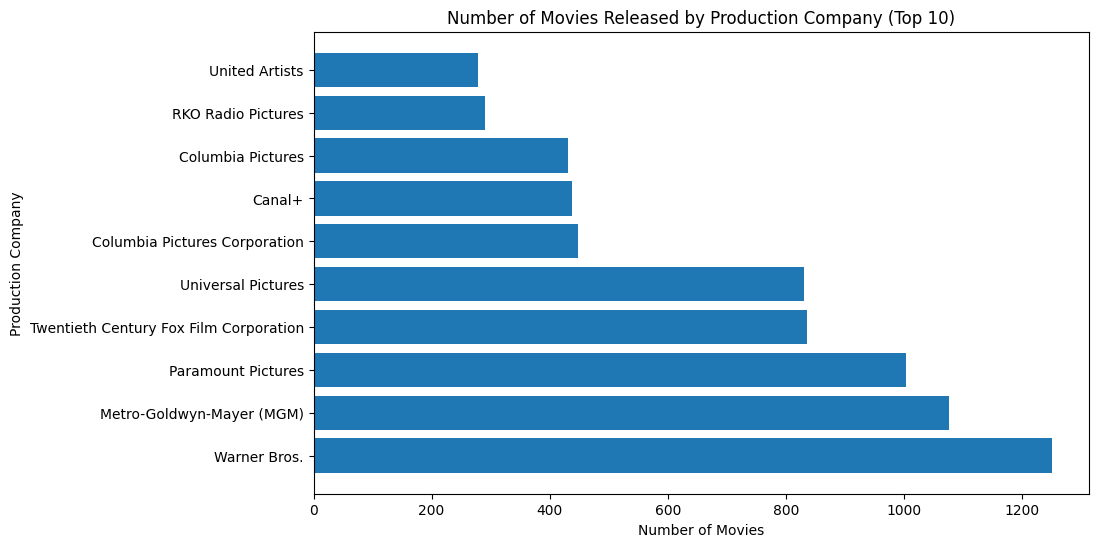

In [78]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Create an empty dictionary to store the count of movies per company
company_counts = {}

# Iterate over each row and count the movies for each company
for companies in df['production_companies']:
    for company in companies:
        company_name = company['name']
        if company_name in company_counts:
            company_counts[company_name] += 1
        else:
            company_counts[company_name] = 1

# Convert the dictionary to a DataFrame and select the top 10 companies
company_df = pd.DataFrame.from_dict(company_counts, orient='index', columns=['Movie Count'])
company_df = company_df.sort_values(by='Movie Count', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(company_df.index, company_df['Movie Count'])
plt.ylabel('Production Company')
plt.xlabel('Number of Movies')
plt.title('Number of Movies Released by Production Company (Top 10)')
plt.show()

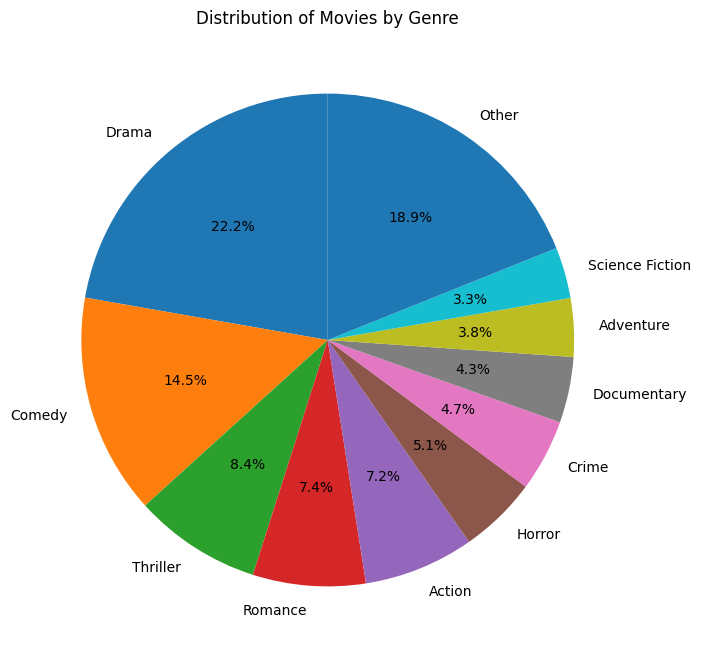

In [74]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Create an empty dictionary to store the count of movies per genre
genre_counts = {}

# Iterate over each row and count the movies for each genre
for genres in df['genres']:
    for genre in genres:
        genre_name = genre['name']
        if genre_name in genre_counts:
            genre_counts[genre_name] += 1
        else:
            genre_counts[genre_name] = 1

# Convert the dictionary to a DataFrame and select the top 10 genres
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Movie Count'])
genre_df = genre_df.sort_values(by='Movie Count', ascending=False)

# Extract the top 10 genres and calculate the count for the "Other" segment
top_10_genres = genre_df.head(10)
other_count = genre_df[10:].sum()

# Create a list of genre labels including the top 10 genres and the "Other" segment
genre_labels = top_10_genres.index.tolist() + ['Other']

# Create a list of movie counts including the counts for the top 10 genres and the "Other" segment
genre_counts = top_10_genres['Movie Count'].tolist() + [other_count]

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies by Genre')
plt.show()


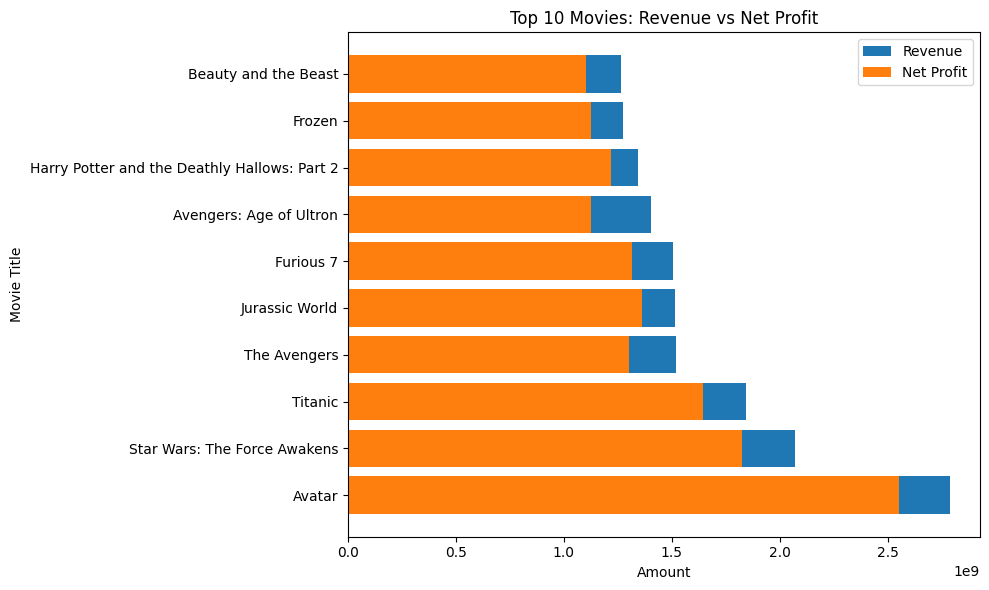

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'budget' and 'revenue' columns to numeric data type
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Drop rows with missing or invalid values in 'budget' and 'revenue' columns
df = df.dropna(subset=['budget', 'revenue'])

# Calculate the net profit (revenue minus budget) and create a new column
df['net_profit'] = df['revenue'] - df['budget']

# Sort the DataFrame by revenue in descending order and select the top 10 movies
top_10_revenue = df.nlargest(10, 'revenue')

# Sort the DataFrame by net profit in descending order and select the top 10 movies
top_10_net_profit = df.nlargest(10, 'net_profit')

# Concatenate the two dataframes
combined_df = pd.concat([top_10_revenue, top_10_net_profit])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(combined_df['title'], combined_df['revenue'], label='Revenue')
plt.barh(combined_df['title'], combined_df['net_profit'], label='Net Profit')
plt.xlabel('Amount')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies: Revenue vs Net Profit')
plt.legend()
plt.tight_layout()
plt.show()

In [93]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import ast

# Load the movie dataset
movies_df = pd.read_csv('/content/the_movies_dataset/movies_metadata.csv')

# Preprocess categorical features
movies_df['belongs_to_collection'] = movies_df['belongs_to_collection'].apply(lambda x: 1 if pd.notnull(x) else 0)
movies_df['genres'] = movies_df['genres'].apply(lambda x: len(ast.literal_eval(x)) if pd.notnull(x) else 0)
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: len(ast.literal_eval(x)) if pd.notnull(x) else 0)
movies_df['production_countries'] = movies_df['production_countries'].apply(lambda x: len(ast.literal_eval(x)) if pd.notnull(x) else 0)



# Normalize numerical features
numerical_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
scaler = MinMaxScaler()
movies_df[numerical_cols] = scaler.fit_transform(movies_df[numerical_cols])


# Drop rows with missing values in numerical columns
movies_df.dropna(subset=numerical_cols, inplace=True)

# Normalize numerical features
scaler = MinMaxScaler()
movies_df[numerical_cols] = scaler.fit_transform(movies_df[numerical_cols])

# ...

# Calculate movie similarity matrix
movie_features = movies_df[['belongs_to_collection', 'genres', 'production_companies', 'production_countries',
                            'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
similarity_matrix = cosine_similarity(movie_features)

# Load the user ratings dataset
ratings_df = pd.read_csv('/content/the_movies_dataset/ratings.csv')

# Define the target user
target_user_id = 1

# Get the ratings of the target user
target_user_ratings = ratings_df[ratings_df['userId'] == target_user_id]

# Get the movies the target user has already seen
seen_movies = target_user_ratings['movieId'].tolist()

# Find k nearest neighbors for each movie in the user's seen list
k = 5  # Number of neighbors to consider
recommendations = []

for movie_id in seen_movies:
    movie_index = movies_df[movies_df['movieId'] == movie_id].index[0]
    movie_similarities = similarity_matrix[movie_index]
    similar_movie_indices = movie_similarities.argsort()[-k-1:-1][::-1]  # Exclude the movie itself
    similar_movies = movies_df.loc[similar_movie_indices]
    recommendations.extend(similar_movies['movieId'].tolist())

# Remove duplicates from recommendations
recommendations = list(set(recommendations))

# Remove movies that the user has already seen
recommendations = [movie_id for movie_id in recommendations if movie_id not in seen_movies]

# Display the recommended movies
recommended_movies = movies_df[movies_df['movieId'].isin(recommendations)]
print("Recommended Movies:")
print(recommended_movies[['movieId', 'title']])

# Predict ratings for recommended movies (using collaborative filtering algorithms)
# Your implementation may vary based on the specific collaborative filtering technique you choose.



<ipython-input-93-a72181b2c415>:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('/content/the_movies_dataset/movies_metadata.csv')


TypeError: ignored